# Jour 1

In [178]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
data = pd.read_csv("Software Engineer Salaries.csv")

In [180]:
data

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [182]:
data["Salary"]

,Salary
0,$68K - $94K (Glassdoor est.)
1,$61K - $104K (Employer est.)
2,$95K - $118K (Glassdoor est.)
3,$97K - $145K (Employer est.)
4,$85K - $108K (Glassdoor est.)
...,...
865,NaN
866,NaN
867,NaN
868,NaN


In [183]:
data = data.dropna(subset=["Salary"])

In [184]:
def salary_min_max(salary):
    try:
        salary=str(salary)
        salary = salary.replace('$', '').replace('K', '').replace('\xa0', '').strip()

        if 'Per Hour' in salary or 'Hourly'in salary or "Per" in salary:
            salary = salary.split()[0]

        if '-' in salary:
            salaries = salary.split('-')

            min_salary = re.sub(r'[^0-9.]+', '', salaries[0].strip())
            min_salary = int(float(min_salary)) * 1000

            max_salary = re.sub(r'[^0-9.]+', '', salaries[1].split("(")[0].strip())
            max_salary = int(float(max_salary)) * 1000

            return min_salary, max_salary

        else:
            unique_salary = re.sub(r'[^0-9.]+', '', salary.split("(")[0].strip())

            #if 'Per Hour' in unique_salary or 'Hourly' in unique_salary:
            #    unique_salary = unique_salary.split()[0]

            #unique_salary = unique_salary.replace('\xa0', '').strip()

            unique_salary = int(float(unique_salary)) * 1000
            return unique_salary, unique_salary

    except ValueError as e:
        print(f"Erreur dans la conversion de {salary} : {e}")
        return None, None

salary_df = pd.DataFrame(data["Salary"].map(salary_min_max).tolist(), columns=["min_salary", "max_salary"])
data = pd.concat([data, salary_df], axis=1)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        764 non-null    object 
 1   Company Score  764 non-null    float64
 2   Job Title      764 non-null    object 
 3   Location       753 non-null    object 
 4   Date           764 non-null    object 
 5   Salary         764 non-null    object 
 6   min_salary     764 non-null    int64  
 7   max_salary     764 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 53.7+ KB


In [186]:
data.drop(columns="Salary", inplace=True)

In [187]:
def clean_job_title(title):
    return re.split(r'\(|-|,', title)[0].strip()

data["Main Job Title"] = data["Job Title"].apply(clean_job_title)

In [188]:
def convert_date_to_days(date_str):
    if 'd' in date_str:
        return int(date_str.replace('d', '').replace('+', '').strip())
    elif 'h' in date_str:
        return int(date_str.replace('h', '').strip()) / 24
    elif 'w' in date_str:
        return int(date_str.replace('w', '').strip()) * 7
    else:
        return None

data['Days Since Posting'] = data['Date'].apply(convert_date_to_days)

In [189]:
def extract_location(location):
    parts = location.split(',')
    if len(parts) == 2:
        city = parts[0].strip()
        state = parts[1].strip()
        remote = False
    elif 'Remote' in location:
        city, state = None, None
        remote = True
    else:
        city, state = location, None
        remote = False
    return city, state, remote


data['Location'] = data['Location'].astype(str)
data[['City', 'State', 'Remote']] = data['Location'].apply(
    lambda x: pd.Series(extract_location(x))
)

In [190]:
data.columns

Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date',
       'min_salary', 'max_salary', 'Main Job Title', 'Days Since Posting',
       'City', 'State', 'Remote'],
      dtype='object')

In [191]:
data = data.drop(columns=['Job Title', 'Date', 'Location'])

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             764 non-null    object 
 1   Company Score       764 non-null    float64
 2   min_salary          764 non-null    int64  
 3   max_salary          764 non-null    int64  
 4   Main Job Title      764 non-null    object 
 5   Days Since Posting  764 non-null    float64
 6   City                728 non-null    object 
 7   State               637 non-null    object 
 8   Remote              764 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 54.5+ KB


In [193]:
data["City"] = data["City"].fillna("Unknown")
data["State"] = data["State"].fillna("UnKnown")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             764 non-null    object 
 1   Company Score       764 non-null    float64
 2   min_salary          764 non-null    int64  
 3   max_salary          764 non-null    int64  
 4   Main Job Title      764 non-null    object 
 5   Days Since Posting  764 non-null    float64
 6   City                764 non-null    object 
 7   State               764 non-null    object 
 8   Remote              764 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 54.5+ KB


# Jour 2

In [194]:
data2 = pd.read_csv("housing.csv")
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [195]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [196]:
data2.dropna(subset=["total_bedrooms"], inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [197]:
data2["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [198]:
proximity_order = {
    'ISLAND': 0,
    'NEAR OCEAN': 1,
    'NEAR BAY': 2,
    '<1H OCEAN': 3,
    'INLAND': 4
}
data2['ocean_proximity'] = data2['ocean_proximity'].map(proximity_order)

In [199]:
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [200]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


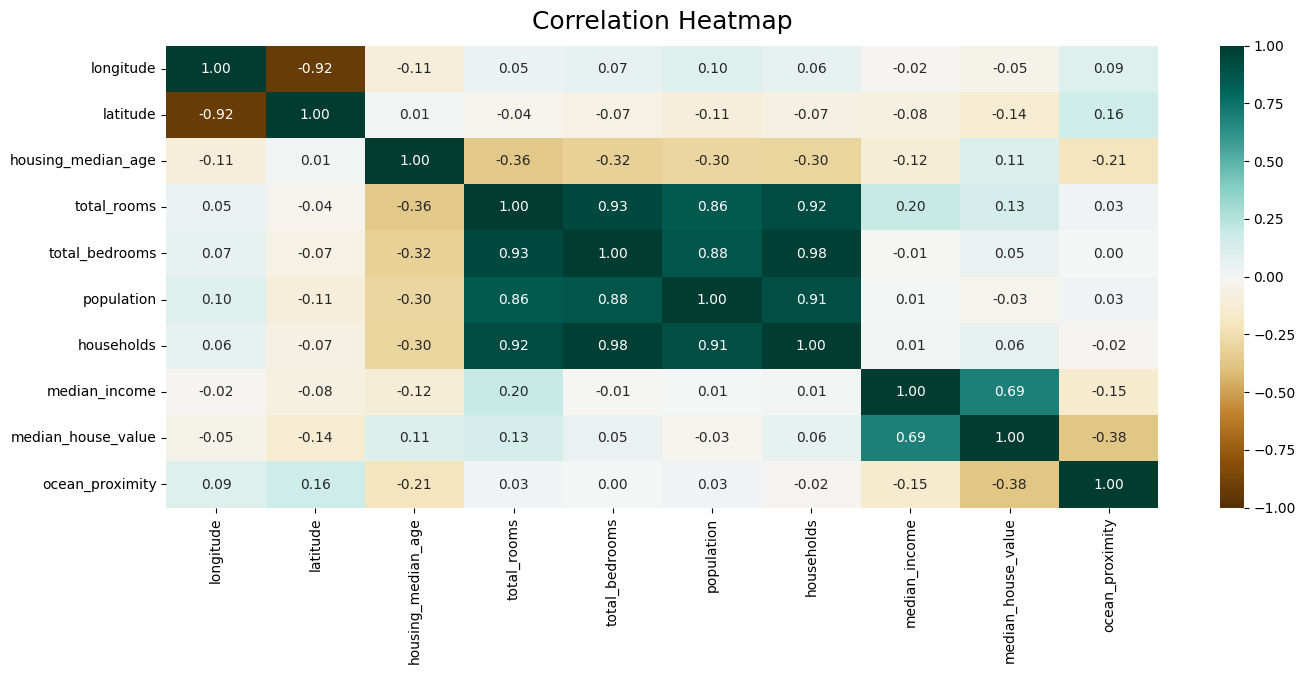

In [201]:
corr_matrice = data2.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrice, vmin=-1, vmax=1, annot=True,  cmap='BrBG', fmt=".2f", annot_kws={"size": 10})
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':18}, pad=12)
plt.show()

In [202]:
from sklearn.model_selection import train_test_split

X = data2.drop("median_house_value", axis=1)
y = data2["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [203]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [204]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 69715.55583560819
R2 Score: 0.6445927259384975


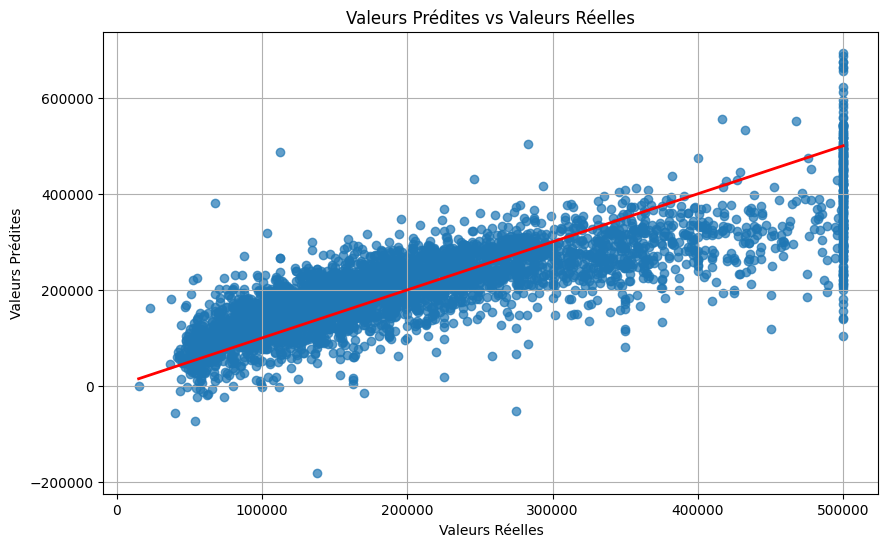

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Prédites vs Valeurs Réelles')
plt.grid()
plt.show()


# Jour 3

In [206]:
data3 = pd.read_csv("titanic.csv")
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: >

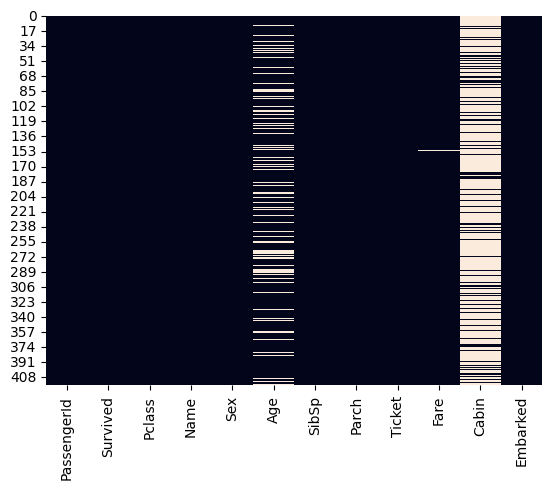

In [208]:
sns.heatmap(data3.isnull(), cbar=False)

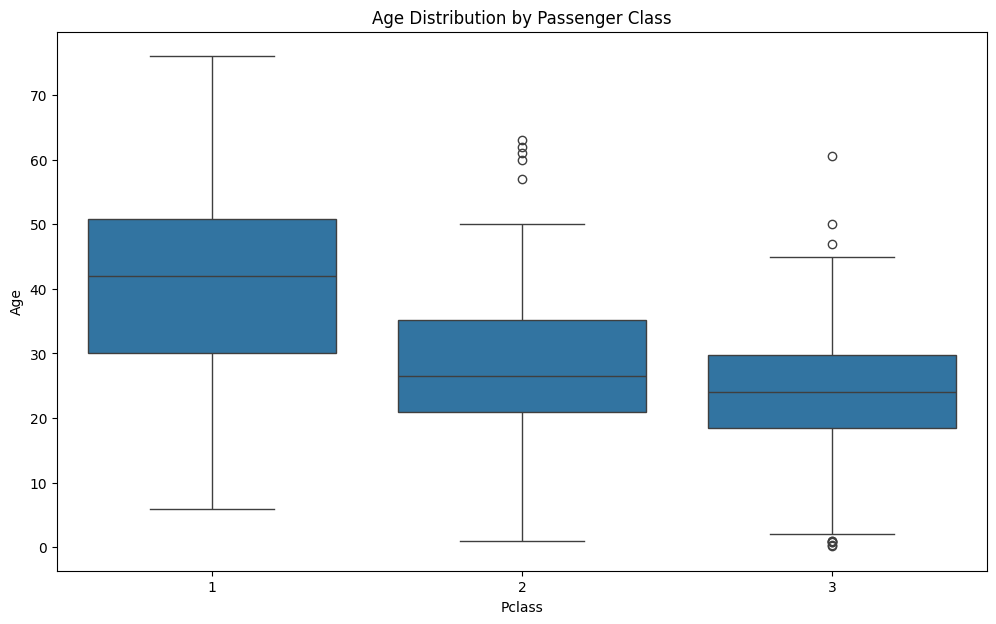

In [209]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=data3)
plt.title('Age Distribution by Passenger Class')
plt.show()

In [210]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

data3['Age'] = data3[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-210-63893cc41689>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-210-63893cc41689>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [211]:
data3.drop('Cabin', axis=1, inplace=True)

In [212]:
data3.dropna(subset=['Fare'], inplace=True)

<Axes: >

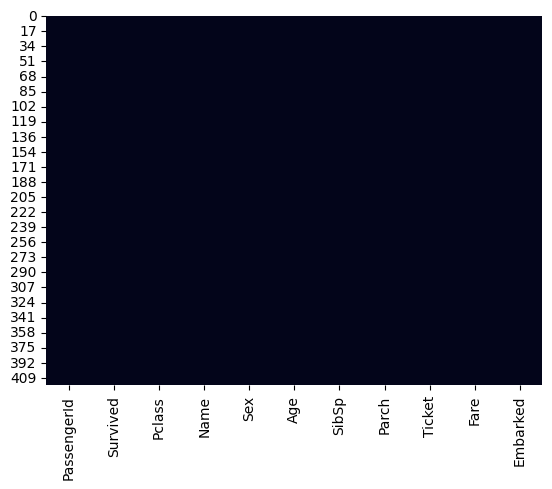

In [213]:
sns.heatmap(data3.isnull(), cbar=False)

In [214]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [215]:
sex = pd.get_dummies(data3['Sex'], drop_first=True)
embark = pd.get_dummies(data3['Embarked'], drop_first=True)

In [216]:
data3.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [217]:
data3 = pd.concat([data3,sex,embark],axis=1)

In [218]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   male         417 non-null    bool   
 8   Q            417 non-null    bool   
 9   S            417 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 27.3 KB


In [219]:
X = data3.drop("Survived", axis=1)
y = data3["Survived"]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=101
)

In [221]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model1.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [223]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [224]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

Matrice de confusion :
[[23  0]
 [ 0 19]]


In [225]:
"""sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion")
plt.show()"""

'sns.heatmap(conf_matrix, annot=True, cmap="Blues")\nplt.xlabel("Valeurs Prédites")\nplt.ylabel("Valeurs Réelles")\nplt.title("Matrice de Confusion")\nplt.show()'

# Jour 4

In [226]:
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [227]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


<Axes: xlabel='median_house_value', ylabel='Count'>

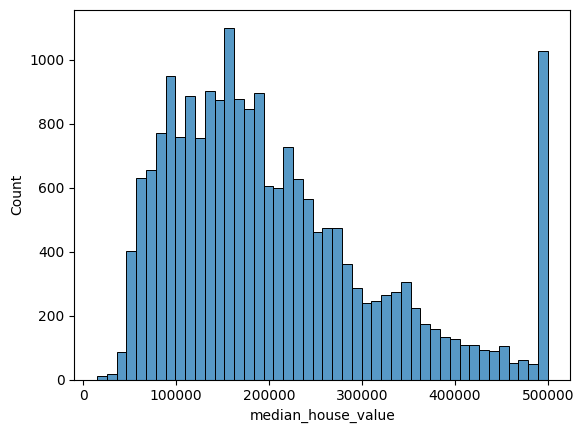

In [228]:
sns.histplot(data2["median_house_value"])

<Axes: xlabel='median_house_value', ylabel='Count'>

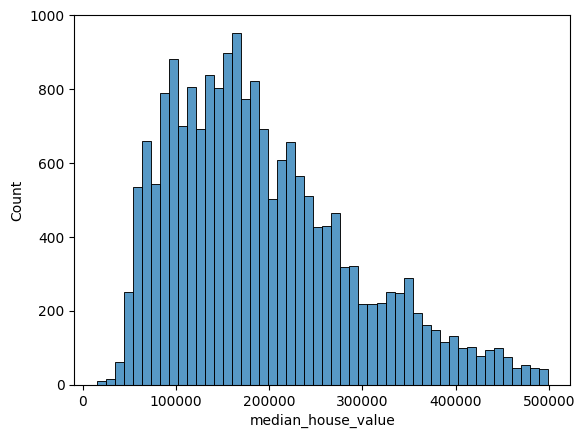

In [229]:
data2 = data2[data2["median_house_value"] < 500000]
sns.histplot(data2["median_house_value"])

In [230]:
X = data2.drop("median_house_value", axis=1)
y = data2["median_house_value"]

In [231]:
import numpy as np
y_log = np.log(y)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_log,
    test_size=0.1,
    random_state=101
)

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [234]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [235]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.exp(y_pred_log)
y_pred

array([266903.19844523, 216494.87356201, 184152.95955082, ...,
       232022.09479215, 166144.56766281,  87862.21787111])

In [236]:
mse = mean_squared_error(np.exp(y_test), y_pred)  # Assure-toi de comparer sur l'échelle originale
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2_score(np.exp(y_test), y_pred))

RMSE:  70811.37513700862
R2 Score:  0.4963873247005105


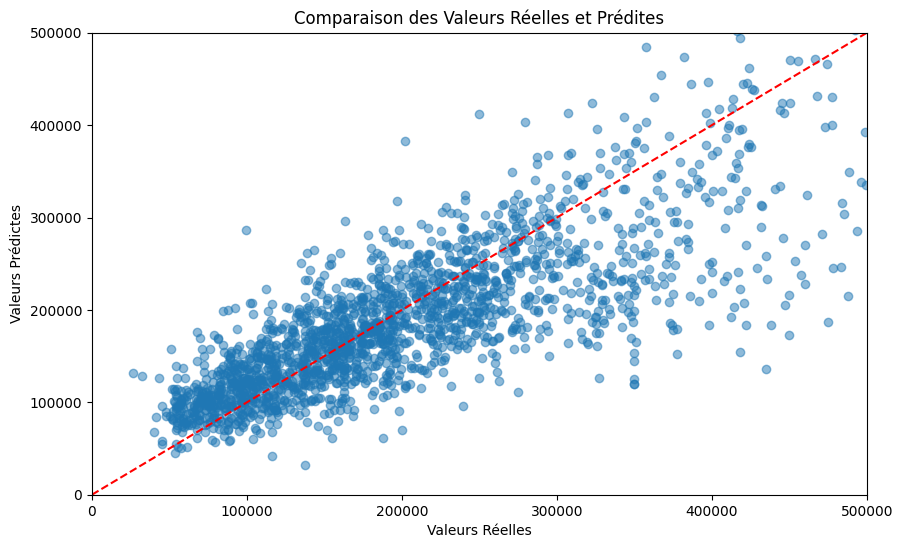

In [237]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), y_pred, alpha=0.5)
plt.plot([0, 500000], [0, 500000], color='red', linestyle='--')  # Ligne y=x pour référence
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédictes")
plt.title("Comparaison des Valeurs Réelles et Prédites")
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.show()


# Jour 5

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [238]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   male         417 non-null    bool   
 8   Q            417 non-null    bool   
 9   S            417 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 27.3 KB


In [239]:
X = data3.drop("Survived", axis=1)
y = data3["Survived"]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=101
)

In [243]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [244]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [245]:
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

In [246]:
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_forest))

Decision Tree Accuracy:  1.0
Random Forest Accuracy:  1.0


In [247]:
from sklearn.svm import SVC

# Entraîner un modèle SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test)

# Évaluation des performances
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

SVM Accuracy:  0.5476190476190477


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Entraîner un modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Entraîner un modèle KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Évaluation des performances
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logistic))
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

# Rapport de classification pour tous les modèles
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_forest))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy:  1.0
KNN Accuracy:  0.6428571428571429

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        23
           1       0.00      0.00      0.00        19

    ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
